In [1]:
import numpy as np
import matplotlib.pyplot as plt
import vectfit

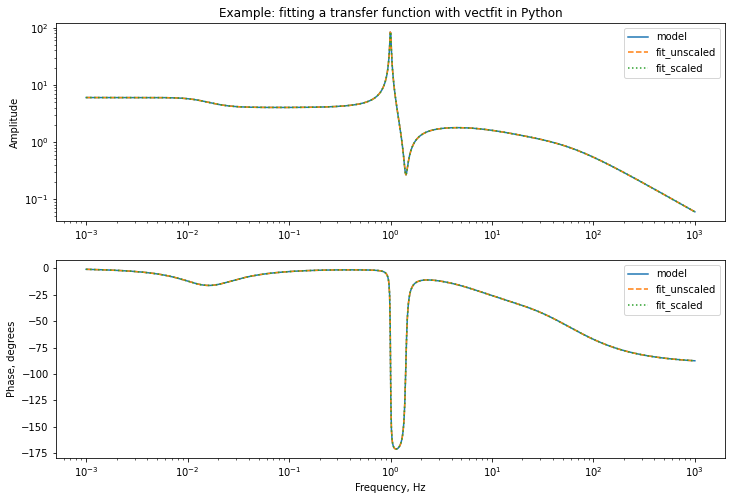

In [4]:
freqs=np.logspace(-3,3,1000)

my_poles = np.array([-1e-2+1e-2j,-1e-2-1e-2j,-1e-2+1j,-1e-2-1j,-1e1,-5e1])
my_residues = -my_poles
my_d=0
my_h=0

my_tf = sum(c/(1j*freqs - a) for c,a in zip(my_residues,my_poles)) + my_d + my_h*1j*freqs # Test TF

uf_poles, uf_residues, uf_d, uf_h = vectfit.vectfit_auto(my_tf, 
                                                         1j*freqs, 
                                                         verbose=False,
                                                         init_spacing='log')
fit_unscaled = vectfit.model(1j*freqs, uf_poles, uf_residues, uf_d, uf_h) # Unscaled vector fitting

sf_poles, sf_residues, sf_d, sf_h = vectfit.vectfit_auto_rescale(my_tf, 
                                                                 1j*freqs, 
                                                                 verbose=False,
                                                                 init_spacing='log')
fit_scaled = vectfit.model(1j*freqs, sf_poles, sf_residues, sf_d, sf_h)

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.title("Example: fitting a transfer function with vectfit in Python")
plt.loglog(freqs, np.abs(my_tf), label = "model")
plt.loglog(freqs, np.abs(fit_unscaled), label = "fit_unscaled", ls="--" )
plt.loglog(freqs, np.abs(fit_scaled), label = "fit_scaled", ls=":")
plt.legend()
plt.ylabel("Amplitude")
plt.subplot(212)
plt.semilogx(freqs, np.angle(my_tf)*180/np.pi, label = "model")
plt.semilogx(freqs, np.angle(fit_unscaled)*180/np.pi, label = "fit_unscaled", ls="--")
plt.semilogx(freqs, np.angle(fit_scaled)*180/np.pi, label = "fit_scaled", ls=":")
plt.legend()
plt.xlabel("Frequency, Hz")
plt.ylabel("Phase, degrees")
plt.show()